# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached certifi-2024.12.14-py3-none-any.whl (164 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)


In [3]:
!pip install wbgapi

Defaulting to user installation because normal site-packages is not writeable


**Note:** Restart the kernel to use updated package(s).

In [98]:
#Import libraries
import wbgapi as wb
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Gather data

### **1.1.** Problem Statement

<p align='justify'>
This project aims to explore the complex relationship between population growth and various aspects of a nation's socioeconomic development over the period 1991-2021. We will investigate how a country's population dynamics can influence key indicators across four major categories: Economic Performance, Labor Market, Investment and Capital Formation, and Education.
</p>

<p align='justify'>
    For this analysis, we will be wrangling six datasets:
    <ol>
        <li><strong>Total Population Data</strong>: This dataset provides annual estimates of the total population for each country and territory in the world.</li>
        <li><strong>GDP Per Capita Growth (annual %)</strong>: This dataset provides the annual percentage growth rate of Gross Domestic Product (GDP) per capita, adjusted for inflation.</li>
        <li><strong>Unemployment Rate</strong>: This dataset provides the percentage of the total labor force that is unemployed.</li>
        <li><strong>Employment to Population Ratio</strong>: This dataset shows the proportion of a country's working-age population (15 years and older) that is employed.</li>
        <li><strong>Gross Capital Formation (% of GDP)</strong>: This dataset measures the total value of gross fixed capital formation (investment in fixed assets like buildings, machinery, and infrastructure) as a percentage of GDP.</li>
        <li><strong>Government Expenditure on Education, total (% of GDP)</strong>: This dataset shows the total public expenditure on education as a percentage of a country's GDP.</li>
    </ol>
</p>

<p>
    The socioeconomic development of nations is a multifaceted process influenced by a complex interplay of factors. By analyzing a comprehensive dataset encompassing various economic indicators, we aim to investigate the relationships between these factors. This analysis will explore the following questions:
    <ol>
        <li>How has the population changed over time for different regions/countries?</li>
        <li>Which regions/countries have experienced the most volatile economic growth (GDP per capita) during this period?</li>
        <li>Is there a visible relationship between GDP per capita growth and unemployment rate?</li>
        <li>Are there any noticeable trends in the employment-to-population ratio over time, and do these trends differ across regions/countries?</li>
    </ol>
</p>

### **1.2.** Datasets Gathering

#### Dataset 1: Total Population Data

**Type**: CSV File.

**Method**: The data was gathered by manually downloading it from <a href='https://www.kaggle.com/datasets/kaggleashwin/population-dataset'>Kaggle</a>.

**Why the Population Dataset?**

This dataset is the foundation of the entire analysis. It provides the total population figures necessary to calculate population growth rates. Without it, we cannot analyze the impact of population dynamics.

**Dataset Variables**:

<p>
    <ul>
        <li><strong>Country Name</strong>: The specific country for which the  data is provided.</li>
        <li><strong>Countyr Code</strong>: A unique code assigned to each country.</li>
        <li><strong>Yearly Columns</strong>These columns provide the time series data, a column for each year from 1960 to 2021.</li>
    </ul>
</p>

In [99]:
#FILL IN 1st data gathering and loading method
population = pd.read_csv("World-population-by-countries-dataset.csv")

#### Dataset 2: GDP Per Capita Growth (annual %)

**Type**: CSV File.

**Method**: The data was gathered manually from the <a href='https://data.worldbank.org/indicator/NY.GDP.PCAP.KD.ZG'>World Bank Open Data</a>.

**Why the GDP Per Capita Dataset?**

This dataset measures the change in average economic output per person, providing insights into how economic progress relates to population growth.

**Dataset Variables**:

<p>
    <ul>
        <li><strong>Country Name</strong>: The specific country for which the  data is provided.</li>
        <li><strong>Countyr Code</strong>: A unique code assigned to each country.</li>
        <li><strong>Indicator Name</strong>: This column specifies the particular indicator.</li>
        <li><strong>Indicator Code</strong>: A unique code for each indicator.</li>
        <li><strong>Yearly Columns</strong>These columns provide the time series data, a column for each year from 1991 to 2023.</li>
    </ul>
</p>

In [100]:
#FILL IN 2nd data gathering and loading method
GDP = pd.read_csv("GDP_Per_Capita_Growth.csv")

#### Dataset 3-4: Unemployment Rate and Employment to Population Ratio

**Type**: CSV File.

**Method**: The data was gathered by accessing the World Bank Data API.

**Why these Datasets?**

These labor market indicators are essential for understanding how population growth affects the labor market.

**Dataset Variables**:

<p>
    <ul>
        <li><strong>economy</strong>: A unique code assigned to each country.</li>
        <li><strong>Yearly Columns</strong>These columns provide the time series data, a column for each year from 1991 to 2023.</li>
    </ul>
</p>

In [101]:
#FILL IN 3rd and 4th data gathering and loading method
uem_rate = wb.data.DataFrame('SL.UEM.TOTL.ZS', time=range(1991, 2022))
em_to_population = wb.data.DataFrame('SL.EMP.TOTL.SP.ZS', time=range(1991, 2022))

#### Dataset 5: Gross Capital Formation (% of GDP)

**Type**: CSV File.

**Method**: The data was gathered using the "API" method from World Bank Data.

**Why the Gross Capital Formation Dataset?**

This dataset measures investment in fixed assets as a percentage of GDP. The reason for including this data is to explore how population growth influences investment levels.

**Dataset Variables**:

<p>
    <em>Same as the Unemployment Rate Dataset</em>
</p>

In [102]:
#FILL IN 5th data gathering and loading method
gross_capital = data = wb.data.DataFrame('NE.GDI.TOTL.ZS', time=range(1991, 2022))

#### Dataset 6: Government Expenditure on Education, total (% of GDP)

**Type**: CSV File.

**Method**: The data was gathered using the "API" method from World Bank Data.

**Why the Government Expenditure on Education Dataset?**

This dataset reflects resource allocation in the education sector. It can be used to analyze how population growth influences public spending priorities in this sector.

**Dataset Variables**:

<p>
    <em>Similar to the Unemployment Rate Dataset</em>
</p>

In [103]:
#FILL IN 6th data gathering and loading method
gov_edu_exp = wb.data.DataFrame('SE.XPD.TOTL.GD.ZS', time=range(1991, 2022))

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [104]:
#Optional: store the raw data in your local data store
uem_rate.to_csv("Unemployment_Rate.csv")
em_to_population.to_csv("Employment_to_Population_Ratio.csv")
gross_capital.to_csv("Gross_Capital_Formation.csv")
gov_edu_exp.to_csv("Total_Government_Expenditure_on_Education.csv")

## 2. Assess data

<p>
    Assessing Data means inspecting the dataset for two things:
    <ol>
        <li><strong>Data quality issues</strong> like missing, duplicates, or incorrect data. This is called <strong>dirty data</strong>.</li>
        <li><strong>Data structural issues</strong> like data have different formats. This is called <strong>messy data</strong>.</li>
    </ol>
</p>
<p>
    When assessing data for <strong>quality issues</strong>, we should consider the following Data Quality Dimensions:
    <ul>
        <li>Completeness</li>
        <li>Validity</li>
        <li>Accuracy</li>
        <li>Consistency, and</li>
        <li>Uniqueness</li>
    </ul>
</p>
<p>
    On the other hand, when assessing data for <strong>tidiness issues</strong>, we should consider the following Tidiness Requirements, as per <a href='https://vita.had.co.nz/papers/tidy-data.pdf'>Hadley Wickham</a>'s Principles of tidy data:
    <ol>
        <li>Each variable forms a column</li>
        <li>Each observation forms a row, and</li>
        <li>Each type of observational unit forms a table</li>
    </ol>
</p>
<p>
    Let us start inspecting the dataframes to uncover Quality and Tidiness issues!
</p>

### Inspecting the Dataframes Visually

In [105]:
#Population dataframe
population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0


In [106]:
#GDP Per Capita Growth dataframe
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2.813435,1.111856,0.492195,2.751524,-0.292643,-2.733864,...,-2.629615,-1.635753,0.951538,7.040657,2.234428,-2.496549,-25.793230,25.154964,8.912308,4.216132
1,Africa Eastern and Southern,AFE,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-2.808265,-4.910566,-3.314233,-0.745923,1.610810,2.699137,...,1.218467,0.264191,-0.468619,0.007074,-0.102513,-0.549575,-5.451410,1.842087,0.903488,-0.226928
2,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.939985,-1.665057,-0.300121,-0.195570,-1.713743,0.856295,-5.382515,-22.584482,-7.576669,0.540656
3,Africa Western and Central,AFW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-1.618631,-0.410927,-3.936399,-2.941386,-0.858862,1.830519,...,3.067195,-0.015338,-2.480965,-0.361652,0.271792,0.744453,-3.341152,1.607197,1.397034,0.917671
4,Angola,AGO,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-2.344653,-8.871345,-26.374196,-1.893068,11.222449,9.768938,...,0.981944,-2.630702,-6.002649,-3.620758,-4.665970,-4.010017,-8.672076,-1.969591,-0.143628,-2.062773


In [107]:
#Unemployment Rate dataframe
uem_rate.head()

,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFE,7.801597,7.896982,7.898076,7.768859,7.533566,7.446310,7.406224,7.438247,7.479567,7.422605,...,6.949656,6.841767,6.807348,6.896303,7.042617,7.145377,7.110553,7.308025,7.734146,8.065361
AFG,7.946000,7.940000,7.961000,7.980000,7.967000,7.941000,7.920000,7.941000,7.953000,7.955000,...,7.909000,7.919000,7.915000,9.011000,10.100000,11.184000,11.206000,11.224000,11.710000,11.934000
AFW,4.158535,4.277885,4.376871,4.399825,4.390342,4.339947,4.323778,4.343833,4.554083,4.610096,...,4.018677,3.713670,3.891935,4.189575,4.127635,4.203684,4.224509,4.247435,4.697560,4.520787
AGO,16.468000,16.621000,17.074000,17.105000,16.711000,16.013000,15.928000,16.148000,16.392000,16.502000,...,16.557000,16.487000,16.401000,16.491000,16.580000,16.617000,16.599000,16.497000,16.676000,15.799000


In [108]:
#Employment to Population Ratio dataframe
em_to_population.head()

,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFE,65.805736,65.739676,65.690095,65.824304,66.154185,66.257776,66.271790,66.199403,66.126306,66.149723,...,65.192136,65.228722,65.133817,65.150441,64.989535,64.872301,64.707577,64.479732,63.357384,63.376181
AFG,43.256000,43.244000,43.207000,43.162000,43.125000,43.071000,43.031000,43.007000,43.003000,43.007000,...,43.244000,43.308000,43.374000,42.924000,42.472000,42.021000,40.493000,38.965000,36.711000,36.263000
AFW,63.230372,63.078172,62.893597,62.755080,62.639287,62.627132,62.572327,62.477991,62.237320,62.104526,...,60.764469,60.548783,60.094383,59.724244,59.711673,59.315840,59.201530,59.097964,58.199145,58.430846
AGO,64.525000,64.391000,63.924000,63.896000,64.309000,65.053000,65.142000,64.908000,64.637000,64.500000,...,64.330000,64.151000,63.994000,63.656000,63.317000,63.028000,62.793000,62.642000,62.550000,64.304000


In [109]:
#Gross Capital Formation dataframe
gross_capital.head()

,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,31.133672,28.461538,30.233406,31.700772,30.869001,25.494114,...,23.522507,23.825855,23.111461,21.538920,20.575010,20.551182,22.401724,22.438504,24.178783,21.788181
AFE,NaN,NaN,NaN,19.386534,19.488941,18.865619,17.654812,19.074242,18.664894,18.784291,...,22.662370,23.349570,23.673371,23.539739,21.500533,20.933449,20.957207,21.538807,20.391104,20.124374
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.500000,13.000000
AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.667577,26.142970,27.500459,34.202491,27.214709,24.130306,17.869421,17.712255,26.490400,26.437362


In [110]:
#Government Expenditure on Education dataframe
gov_edu_exp.head()

,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.76316,4.395270,4.71468,...,6.347290,6.442960,4.857049,5.888270,5.491360,4.456181,4.548759,4.435043,NaN,NaN
AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.887420,3.60613,...,4.931210,4.783307,4.792651,4.758470,4.665563,4.878870,4.979931,4.944317,4.352440,4.771326
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.604200,3.454460,3.695220,3.255800,4.543970,4.343190,NaN,NaN,NaN,NaN
AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.345825,2.46335,...,2.810415,2.850710,2.666670,2.984198,2.667731,3.360854,3.023458,3.047400,3.398741,3.203484
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.56712,NaN,2.60753,...,3.081911,3.870000,2.930000,3.100000,2.754937,2.466879,2.183513,2.073064,2.667447,2.297109


<p>
    Simply taking a first look at all our dataframes, we've uncovered our first data <strong>quality issue</strong>: an inconsistency in how the years columns are labeled throughout the dataframes.
</p>
<p>
    Let us dive into it!
</p>

### Quality Issue 1:

<p>
    After visually inspecting the data, it seems the data we pulled directly from API uses "YR" before the year (like YR1991, YR1992).
</p>

In [111]:
print(population.head(0).to_markdown(index=False))

| Country Name   | Country Code   | 1960   | 1961   | 1962   | 1963   | 1964   | 1965   | 1966   | 1967   | 1968   | 1969   | 1970   | 1971   | 1972   | 1973   | 1974   | 1975   | 1976   | 1977   | 1978   | 1979   | 1980   | 1981   | 1982   | 1983   | 1984   | 1985   | 1986   | 1987   | 1988   | 1989   | 1990   | 1991   | 1992   | 1993   | 1994   | 1995   | 1996   | 1997   | 1998   | 1999   | 2000   | 2001   | 2002   | 2003   | 2004   | 2005   | 2006   | 2007   | 2008   | 2009   | 2010   | 2011   | 2012   | 2013   | 2014   | 2015   | 2016   | 2017   | 2018   | 2019   | 2020   | 2021   |
|----------------|----------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--

In [112]:
print(GDP.head(0).to_markdown(index=False))

| Country Name   | Country Code   | Indicator Name   | Indicator Code   | 1991   | 1992   | 1993   | 1994   | 1995   | 1996   | 1997   | 1998   | 1999   | 2000   | 2001   | 2002   | 2003   | 2004   | 2005   | 2006   | 2007   | 2008   | 2009   | 2010   | 2011   | 2012   | 2013   | 2014   | 2015   | 2016   | 2017   | 2018   | 2019   | 2020   | 2021   | 2022   | 2023   |
|----------------|----------------|------------------|------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|


<p>
    However, the datasets that were downloaded manually only have the year as a number (1991, 1992). 
</p>

In [113]:
print(uem_rate.head(0).to_markdown(index=False))

| YR1991   | YR1992   | YR1993   | YR1994   | YR1995   | YR1996   | YR1997   | YR1998   | YR1999   | YR2000   | YR2001   | YR2002   | YR2003   | YR2004   | YR2005   | YR2006   | YR2007   | YR2008   | YR2009   | YR2010   | YR2011   | YR2012   | YR2013   | YR2014   | YR2015   | YR2016   | YR2017   | YR2018   | YR2019   | YR2020   | YR2021   |
|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|


In [114]:
print(em_to_population.head(0).to_markdown(index=False))

| YR1991   | YR1992   | YR1993   | YR1994   | YR1995   | YR1996   | YR1997   | YR1998   | YR1999   | YR2000   | YR2001   | YR2002   | YR2003   | YR2004   | YR2005   | YR2006   | YR2007   | YR2008   | YR2009   | YR2010   | YR2011   | YR2012   | YR2013   | YR2014   | YR2015   | YR2016   | YR2017   | YR2018   | YR2019   | YR2020   | YR2021   |
|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|


In [115]:
print(gross_capital.head(0).to_markdown(index=False))

| YR1991   | YR1992   | YR1993   | YR1994   | YR1995   | YR1996   | YR1997   | YR1998   | YR1999   | YR2000   | YR2001   | YR2002   | YR2003   | YR2004   | YR2005   | YR2006   | YR2007   | YR2008   | YR2009   | YR2010   | YR2011   | YR2012   | YR2013   | YR2014   | YR2015   | YR2016   | YR2017   | YR2018   | YR2019   | YR2020   | YR2021   |
|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|


In [116]:
print(gov_edu_exp.head(0).to_markdown(index=False))

| YR1991   | YR1992   | YR1993   | YR1994   | YR1995   | YR1996   | YR1997   | YR1998   | YR1999   | YR2000   | YR2001   | YR2002   | YR2003   | YR2004   | YR2005   | YR2006   | YR2007   | YR2008   | YR2009   | YR2010   | YR2011   | YR2012   | YR2013   | YR2014   | YR2015   | YR2016   | YR2017   | YR2018   | YR2019   | YR2020   | YR2021   |
|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|


<p>
    This consistency issue may not seem as a big deal, however, it will make it tricky to combine everything smoothly.
</p>

### Quality Issue 2:

<p>
    After working closely with the year columns, which represent the temporal coverage of our investigation, we've noticed another little hiccup! An inconsistency in the time periods represented by each dataset.
</p>
<p>
    Let us investigate it quickly before we move on.
</p>

In [117]:
population.columns

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')

In [118]:
GDP.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [119]:
uem_rate.columns

Index(['YR1991', 'YR1992', 'YR1993', 'YR1994', 'YR1995', 'YR1996', 'YR1997',
       'YR1998', 'YR1999', 'YR2000', 'YR2001', 'YR2002', 'YR2003', 'YR2004',
       'YR2005', 'YR2006', 'YR2007', 'YR2008', 'YR2009', 'YR2010', 'YR2011',
       'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016', 'YR2017', 'YR2018',
       'YR2019', 'YR2020', 'YR2021'],
      dtype='object')

In [120]:
em_to_population.columns

Index(['YR1991', 'YR1992', 'YR1993', 'YR1994', 'YR1995', 'YR1996', 'YR1997',
       'YR1998', 'YR1999', 'YR2000', 'YR2001', 'YR2002', 'YR2003', 'YR2004',
       'YR2005', 'YR2006', 'YR2007', 'YR2008', 'YR2009', 'YR2010', 'YR2011',
       'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016', 'YR2017', 'YR2018',
       'YR2019', 'YR2020', 'YR2021'],
      dtype='object')

In [121]:
gross_capital.columns

Index(['YR1991', 'YR1992', 'YR1993', 'YR1994', 'YR1995', 'YR1996', 'YR1997',
       'YR1998', 'YR1999', 'YR2000', 'YR2001', 'YR2002', 'YR2003', 'YR2004',
       'YR2005', 'YR2006', 'YR2007', 'YR2008', 'YR2009', 'YR2010', 'YR2011',
       'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016', 'YR2017', 'YR2018',
       'YR2019', 'YR2020', 'YR2021'],
      dtype='object')

In [122]:
gov_edu_exp.columns

Index(['YR1991', 'YR1992', 'YR1993', 'YR1994', 'YR1995', 'YR1996', 'YR1997',
       'YR1998', 'YR1999', 'YR2000', 'YR2001', 'YR2002', 'YR2003', 'YR2004',
       'YR2005', 'YR2006', 'YR2007', 'YR2008', 'YR2009', 'YR2010', 'YR2011',
       'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016', 'YR2017', 'YR2018',
       'YR2019', 'YR2020', 'YR2021'],
      dtype='object')

<p>
    All it needed was a simple comparison of the columns across all datasets. It turned out that the two datasets that were collected manually each cover different periods of time. This mismatch in coverage is definitely going to make it tricky to combine everything neatly for our analysis. Therefore, we will need to drop these columns to line everything up.
</p>

___________________________________________________________________
<p>
    Moving to the next step, let's inspect our data <em>programmatically</em> to uncover more quality issues.
</p>

### Inspecting the Dataframes Programmatically

In [123]:
#Population dataframe
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   1960          264 non-null    float64
 3   1961          264 non-null    float64
 4   1962          264 non-null    float64
 5   1963          264 non-null    float64
 6   1964          264 non-null    float64
 7   1965          264 non-null    float64
 8   1966          264 non-null    float64
 9   1967          264 non-null    float64
 10  1968          264 non-null    float64
 11  1969          264 non-null    float64
 12  1970          264 non-null    float64
 13  1971          264 non-null    float64
 14  1972          264 non-null    float64
 15  1973          264 non-null    float64
 16  1974          264 non-null    float64
 17  1975          264 non-null    float64
 18  1976          264 non-null    

In [124]:
population.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,1.172174e+08,1.187633e+08,1.208717e+08,1.234910e+08,1.261315e+08,1.288372e+08,1.316853e+08,1.345256e+08,1.374350e+08,1.404490e+08,...,2.874902e+08,2.912969e+08,2.951160e+08,2.989277e+08,3.027560e+08,3.065980e+08,3.103591e+08,3.140425e+08,3.176734e+08,3.210893e+08
std,3.695745e+08,3.739180e+08,3.804316e+08,3.889142e+08,3.974401e+08,4.062000e+08,4.155171e+08,4.247722e+08,4.342805e+08,4.441772e+08,...,9.017511e+08,9.129343e+08,9.241050e+08,9.352101e+08,9.463321e+08,9.575052e+08,9.683483e+08,9.788967e+08,9.891628e+08,9.988295e+08
min,2.833000e+03,3.077000e+03,3.367000e+03,3.703000e+03,4.063000e+03,4.460000e+03,4.675000e+03,4.922000e+03,5.194000e+03,5.461000e+03,...,1.013600e+04,1.020800e+04,1.028900e+04,1.037400e+04,1.047400e+04,1.057700e+04,1.067800e+04,1.076400e+04,1.083400e+04,1.087300e+04
25%,5.022802e+05,5.109642e+05,5.206540e+05,5.311622e+05,5.421252e+05,5.533362e+05,5.647475e+05,5.823645e+05,5.981078e+05,6.100030e+05,...,1.539939e+06,1.574621e+06,1.609909e+06,1.645868e+06,1.689616e+06,1.716772e+06,1.740174e+06,1.751950e+06,1.767996e+06,1.791783e+06
50%,3.718330e+06,3.826398e+06,3.929109e+06,4.015834e+06,4.124521e+06,4.242788e+06,4.326013e+06,4.387887e+06,4.474171e+06,4.550402e+06,...,9.824808e+06,9.948838e+06,1.001582e+07,1.022085e+07,1.036160e+07,1.040671e+07,1.045548e+07,1.047907e+07,1.052565e+07,1.054019e+07
75%,2.636053e+07,2.721235e+07,2.808607e+07,2.890669e+07,2.972333e+07,3.055227e+07,3.134845e+07,3.200449e+07,3.244145e+07,3.277149e+07,...,6.057984e+07,6.120753e+07,6.174243e+07,6.182699e+07,6.187352e+07,6.191725e+07,6.193141e+07,6.150589e+07,6.157091e+07,6.295547e+07
max,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,3.392098e+09,3.461620e+09,3.532783e+09,3.606554e+09,...,7.089255e+09,7.175500e+09,7.261847e+09,7.347679e+09,7.433651e+09,7.519371e+09,7.602716e+09,7.683806e+09,7.763933e+09,7.836631e+09


In [125]:
#GDP Per Capita Growth dataframe
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1991            242 non-null    float64
 5   1992            242 non-null    float64
 6   1993            243 non-null    float64
 7   1994            243 non-null    float64
 8   1995            244 non-null    float64
 9   1996            245 non-null    float64
 10  1997            245 non-null    float64
 11  1998            247 non-null    float64
 12  1999            247 non-null    float64
 13  2000            247 non-null    float64
 14  2001            248 non-null    float64
 15  2002            248 non-null    float64
 16  2003            252 non-null    float64
 17  2004            252 non-null    flo

In [126]:
GDP.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,242.000000,242.000000,243.000000,243.000000,244.000000,245.000000,245.000000,247.000000,247.000000,247.000000,...,258.000000,258.000000,257.000000,257.000000,258.000000,257.000000,257.000000,257.000000,254.000000,243.000000
mean,-1.069519,-0.634142,-0.141312,0.421468,2.292113,2.878273,3.734688,1.982940,1.719708,3.164975,...,1.914367,1.370844,1.831634,2.088418,1.882928,1.758542,-5.725255,4.812316,3.268133,2.120353
std,7.820775,9.347791,6.867323,7.363563,5.828964,6.071718,11.405264,4.803216,4.608498,6.227526,...,3.245691,4.390206,3.665207,3.990283,2.892246,3.320695,7.631386,5.703316,5.967617,6.055829
min,-64.423582,-45.324884,-35.546284,-41.540612,-14.230487,-18.319430,-13.590922,-23.877852,-27.113647,-16.217142,...,-24.511054,-30.150755,-12.097110,-9.306452,-18.050560,-12.498917,-55.228911,-22.584482,-21.695245,-19.004549
25%,-2.843855,-3.089044,-2.244206,-1.473025,0.324190,0.883746,1.214009,0.365098,-0.406102,1.130745,...,0.558534,0.008060,0.277408,0.462320,0.503853,0.071604,-8.075626,1.771729,1.349278,0.294870
50%,-0.384955,0.127308,0.459093,1.768206,2.233087,2.572464,2.794926,2.059203,1.882233,3.089054,...,1.899610,1.585844,1.895257,2.111493,2.006731,1.641704,-4.665290,4.414695,2.808548,1.708805
75%,2.298572,3.454350,3.103502,3.740303,3.979864,4.496944,4.425325,3.899009,3.686224,4.422790,...,3.690974,3.442575,3.488788,3.934980,3.815200,3.228631,-2.460782,7.040927,4.855505,3.732239
max,46.443818,51.103509,31.010410,17.553636,61.873535,60.341092,140.490578,30.825438,20.816108,77.089569,...,13.984753,23.443691,31.097891,30.395061,8.384961,21.827247,43.512346,33.768559,62.111024,74.674529


In [127]:
#Unemployment Rate dataframe
uem_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, ABW to ZWE
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YR1991  235 non-null    float64
 1   YR1992  235 non-null    float64
 2   YR1993  235 non-null    float64
 3   YR1994  235 non-null    float64
 4   YR1995  235 non-null    float64
 5   YR1996  235 non-null    float64
 6   YR1997  235 non-null    float64
 7   YR1998  235 non-null    float64
 8   YR1999  235 non-null    float64
 9   YR2000  235 non-null    float64
 10  YR2001  235 non-null    float64
 11  YR2002  235 non-null    float64
 12  YR2003  235 non-null    float64
 13  YR2004  235 non-null    float64
 14  YR2005  235 non-null    float64
 15  YR2006  235 non-null    float64
 16  YR2007  235 non-null    float64
 17  YR2008  235 non-null    float64
 18  YR2009  235 non-null    float64
 19  YR2010  235 non-null    float64
 20  YR2011  235 non-null    float64
 21  YR2012  235 non-null    float64
 22  YR201

In [128]:
uem_rate.describe()

,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,7.295803,7.644871,8.083408,8.244240,8.297448,8.420422,8.300753,8.363285,8.516556,8.410380,...,8.056805,8.066915,7.896356,7.830915,7.701030,7.491022,7.226040,7.083905,8.132096,7.816321
std,5.555398,5.850797,5.907194,5.811913,5.878535,5.881404,5.703086,5.661118,5.659581,5.705172,...,5.631263,5.707086,5.550865,5.431416,5.332940,5.218245,5.173212,5.097938,5.453360,5.446322
min,0.586000,0.583000,0.588000,0.591000,0.596000,0.591000,0.596000,0.600000,0.602000,0.597000,...,0.480000,0.249000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.140000,0.140000
25%,3.038000,3.302000,3.903876,4.177000,4.155000,4.261843,4.243000,4.342917,4.468257,4.340911,...,4.007839,4.060672,4.166330,4.303500,4.272000,4.026500,3.824342,3.734000,4.456500,4.473451
50%,5.941258,6.130639,6.287000,6.692845,7.092000,7.225000,7.072000,7.159000,7.070439,6.795163,...,6.615000,6.390467,6.205097,6.412000,6.009191,5.911476,5.474382,5.551000,6.609138,6.194000
75%,9.613000,10.043999,10.781752,11.008000,10.836797,11.405000,11.051913,11.356000,11.765000,11.584500,...,10.762367,10.460500,10.490726,9.965447,9.896317,9.405000,9.109000,9.131500,10.336444,9.518500
max,29.933000,30.128000,30.401000,30.366000,35.600000,38.800000,36.000000,34.500000,32.400000,32.200000,...,31.096000,29.017000,28.215000,27.695000,25.999000,26.064000,26.983000,29.049000,34.232000,35.707000


In [129]:
#Employment to Population Ratio dataframe
em_to_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, ABW to ZWE
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YR1991  235 non-null    float64
 1   YR1992  235 non-null    float64
 2   YR1993  235 non-null    float64
 3   YR1994  235 non-null    float64
 4   YR1995  235 non-null    float64
 5   YR1996  235 non-null    float64
 6   YR1997  235 non-null    float64
 7   YR1998  235 non-null    float64
 8   YR1999  235 non-null    float64
 9   YR2000  235 non-null    float64
 10  YR2001  235 non-null    float64
 11  YR2002  235 non-null    float64
 12  YR2003  235 non-null    float64
 13  YR2004  235 non-null    float64
 14  YR2005  235 non-null    float64
 15  YR2006  235 non-null    float64
 16  YR2007  235 non-null    float64
 17  YR2008  235 non-null    float64
 18  YR2009  235 non-null    float64
 19  YR2010  235 non-null    float64
 20  YR2011  235 non-null    float64
 21  YR2012  235 non-null    float64
 22  YR201

In [130]:
em_to_population.describe()

,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,57.636470,57.378128,57.065429,56.978864,56.909636,56.754929,56.823777,56.774986,56.667705,56.626517,...,56.123806,56.047277,56.126360,56.189585,56.258053,56.351425,56.497882,56.591734,54.818976,55.419719
std,10.969831,11.000227,11.051902,11.029415,11.119143,11.107683,11.032996,10.996344,10.930065,10.924264,...,10.785514,10.752443,10.716068,10.682876,10.574818,10.545807,10.567826,10.535689,10.538706,10.587107
min,26.990000,26.938000,26.677000,26.576000,26.383000,26.317000,26.234000,26.256000,26.315000,26.210000,...,24.181000,24.115000,24.027000,23.986000,23.974000,23.860000,23.711000,23.593000,22.657000,22.634000
25%,50.664359,50.582799,50.299000,50.200500,49.925000,50.176500,50.870000,50.390000,50.547000,50.349731,...,50.301172,50.330168,50.682723,51.145101,51.301487,51.790579,51.767837,51.670373,49.780000,49.367500
50%,57.568000,57.055000,56.878000,56.831000,56.763000,56.253000,56.228188,56.522000,56.200000,56.225000,...,56.437000,56.862000,56.903000,57.113000,56.976000,56.947000,57.123099,57.366000,55.029323,56.179023
75%,63.968500,63.564923,63.602500,63.283835,63.274900,63.196000,63.453256,63.409000,63.127308,63.216500,...,62.885419,62.377000,62.668968,62.480500,62.511500,62.194445,62.257000,62.325021,60.970000,62.004147
max,86.724000,86.139000,85.317000,84.627000,83.988000,83.478000,83.600000,83.625000,83.658000,83.723000,...,85.873000,86.059000,86.639000,87.241000,87.396000,87.368000,87.395000,87.323000,87.493000,87.518000


In [131]:
#Gross Capital Formation dataframe
gross_capital.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, ABW to ZWE
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YR1991  177 non-null    float64
 1   YR1992  178 non-null    float64
 2   YR1993  182 non-null    float64
 3   YR1994  185 non-null    float64
 4   YR1995  195 non-null    float64
 5   YR1996  196 non-null    float64
 6   YR1997  196 non-null    float64
 7   YR1998  198 non-null    float64
 8   YR1999  198 non-null    float64
 9   YR2000  203 non-null    float64
 10  YR2001  204 non-null    float64
 11  YR2002  205 non-null    float64
 12  YR2003  206 non-null    float64
 13  YR2004  207 non-null    float64
 14  YR2005  209 non-null    float64
 15  YR2006  211 non-null    float64
 16  YR2007  213 non-null    float64
 17  YR2008  215 non-null    float64
 18  YR2009  216 non-null    float64
 19  YR2010  217 non-null    float64
 20  YR2011  218 non-null    float64
 21  YR2012  218 non-null    float64
 22  YR201

In [132]:
gross_capital.describe()

,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
count,177.000000,178.000000,182.000000,185.000000,195.000000,196.000000,196.000000,198.000000,198.000000,203.000000,...,218.000000,218.000000,219.000000,220.000000,219.000000,218.000000,217.000000,215.000000,215.000000,215.000000
mean,22.704218,22.884593,22.355836,22.782516,22.715399,22.821618,22.389213,22.731734,22.096484,22.101151,...,25.473185,25.104447,24.916628,25.049526,24.938991,24.824456,25.367939,25.162801,24.148716,24.684056
std,8.306245,8.375340,8.200040,8.284535,7.713758,7.740115,7.500164,6.736458,7.015874,6.507505,...,8.945921,8.596078,7.982612,8.517945,8.259096,7.383728,7.707709,7.812958,7.908161,7.879880
min,-12.880080,-0.692932,0.000000,0.000000,0.000000,0.000000,-2.424358,0.000000,0.000000,0.000000,...,7.074253,7.515324,2.854504,-3.945924,8.075299,3.339739,2.786970,2.281532,1.042162,-15.916636
25%,17.835485,18.395805,17.407739,18.386637,18.634722,18.640435,18.011523,19.048346,18.336544,19.230794,...,19.747994,20.266033,20.380588,20.537584,20.259045,20.498190,20.706176,20.604524,19.272302,20.535047
50%,22.870188,22.518825,21.588724,22.247132,22.364290,22.278162,22.366926,22.818015,22.372952,22.512035,...,24.275814,24.076643,23.864611,24.156552,23.708790,23.728083,23.897420,23.994545,23.328863,24.068608
75%,26.921425,27.516055,26.471827,26.310167,26.004114,25.734575,25.693243,26.223737,25.606320,25.151474,...,29.301418,28.793887,28.646742,28.923664,28.385216,28.201258,28.918772,28.623863,28.373539,28.547825
max,45.762712,51.751326,59.340942,58.172049,51.444409,58.011933,53.927836,45.494820,45.514180,54.042047,...,69.448727,64.014324,56.511954,76.782325,71.266856,54.167769,54.015517,53.713554,46.906956,55.058016


In [133]:
#Government Expenditure on Education dataframe
gov_edu_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, ABW to ZWE
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YR1991  64 non-null     float64
 1   YR1992  68 non-null     float64
 2   YR1993  69 non-null     float64
 3   YR1994  81 non-null     float64
 4   YR1995  92 non-null     float64
 5   YR1996  94 non-null     float64
 6   YR1997  41 non-null     float64
 7   YR1998  103 non-null    float64
 8   YR1999  152 non-null    float64
 9   YR2000  170 non-null    float64
 10  YR2001  160 non-null    float64
 11  YR2002  171 non-null    float64
 12  YR2003  147 non-null    float64
 13  YR2004  172 non-null    float64
 14  YR2005  153 non-null    float64
 15  YR2006  159 non-null    float64
 16  YR2007  148 non-null    float64
 17  YR2008  171 non-null    float64
 18  YR2009  175 non-null    float64
 19  YR2010  193 non-null    float64
 20  YR2011  194 non-null    float64
 21  YR2012  207 non-null    float64
 22  YR201

In [134]:
gov_edu_exp.describe()

,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
count,64.000000,68.000000,69.000000,81.000000,92.000000,94.000000,41.00000,103.000000,152.000000,170.000000,...,207.000000,202.000000,207.000000,211.000000,213.000000,216.000000,210.000000,212.000000,208.000000,207.000000
mean,4.139680,4.618257,4.648394,5.091316,4.078208,4.090447,3.95033,3.997305,4.251682,4.187906,...,4.398578,4.419850,4.381940,4.375259,4.339360,4.268174,4.220953,4.274549,4.429295,4.351161
std,1.458276,2.889721,1.749371,4.676529,1.581416,1.632867,1.95733,1.600292,1.841807,1.732718,...,1.831276,1.756939,1.744372,1.673800,1.767662,1.612193,1.651561,1.714223,1.607865,1.760087
min,1.073990,0.913610,0.773950,0.893370,1.004350,1.078550,1.07208,0.000000,1.195270,1.012180,...,0.549233,0.534207,0.470743,0.436955,0.393046,0.396354,0.419998,0.358479,0.359638,0.381919
25%,3.135137,3.103288,3.817830,3.477070,2.900400,2.970047,2.98517,2.784595,2.963970,2.846168,...,3.184863,3.299488,3.301090,3.303232,3.229290,3.441989,3.201183,3.239708,3.398741,3.203484
50%,3.995815,4.335980,4.840950,4.703060,4.299515,4.109360,3.51327,4.039870,4.072897,3.893805,...,4.195711,4.344810,4.215900,4.238610,4.225440,4.094446,4.047090,4.047526,4.370730,4.131550
75%,5.117828,5.281410,5.507030,5.588190,4.853522,4.911040,4.62038,4.841395,5.057883,5.163850,...,5.464790,5.270970,5.179051,5.091995,5.107660,4.961320,4.953810,5.019610,5.331215,5.229938
max,7.144970,22.322210,8.577030,44.333981,8.640970,9.896640,11.36401,8.281310,13.849850,10.091550,...,13.427666,13.219000,12.953000,13.647000,13.513000,13.575000,15.377000,13.768655,10.539000,14.195160


Seems like we have a small issue...

### Quality Issue 3:

<p>
    A programmatic inspection of the dataframes has revealed a significant data quality issue related to <strong>completeness</strong>.
</p>

### Quality Issue 4:

<p>
    The last quality issue that we're going to quickly fix is related to a column-naming convention.
</p>

As we've noticed, the `Country Code` column and the `economy` column both represent the same data, but under different names. This is going to cause a problem, as we're planning to use this specific column to merge the dataframes later.

___________________________________________________________________
<p>
    Now, let's continue our inspection to uncover some <strong>Tidiness Issues</strong>.
</p>

### Inspecting the Dataframes Visually

In [135]:
#Population dataframe
population.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0


In [136]:
#GDP Per Capita Growth dataframe
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2.813435,1.111856,0.492195,2.751524,-0.292643,-2.733864,...,-2.629615,-1.635753,0.951538,7.040657,2.234428,-2.496549,-25.793230,25.154964,8.912308,4.216132
1,Africa Eastern and Southern,AFE,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-2.808265,-4.910566,-3.314233,-0.745923,1.610810,2.699137,...,1.218467,0.264191,-0.468619,0.007074,-0.102513,-0.549575,-5.451410,1.842087,0.903488,-0.226928
2,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.939985,-1.665057,-0.300121,-0.195570,-1.713743,0.856295,-5.382515,-22.584482,-7.576669,0.540656
3,Africa Western and Central,AFW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-1.618631,-0.410927,-3.936399,-2.941386,-0.858862,1.830519,...,3.067195,-0.015338,-2.480965,-0.361652,0.271792,0.744453,-3.341152,1.607197,1.397034,0.917671
4,Angola,AGO,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-2.344653,-8.871345,-26.374196,-1.893068,11.222449,9.768938,...,0.981944,-2.630702,-6.002649,-3.620758,-4.665970,-4.010017,-8.672076,-1.969591,-0.143628,-2.062773


In [137]:
#Unemployment Rate dataframe
uem_rate.head()

,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFE,7.801597,7.896982,7.898076,7.768859,7.533566,7.446310,7.406224,7.438247,7.479567,7.422605,...,6.949656,6.841767,6.807348,6.896303,7.042617,7.145377,7.110553,7.308025,7.734146,8.065361
AFG,7.946000,7.940000,7.961000,7.980000,7.967000,7.941000,7.920000,7.941000,7.953000,7.955000,...,7.909000,7.919000,7.915000,9.011000,10.100000,11.184000,11.206000,11.224000,11.710000,11.934000
AFW,4.158535,4.277885,4.376871,4.399825,4.390342,4.339947,4.323778,4.343833,4.554083,4.610096,...,4.018677,3.713670,3.891935,4.189575,4.127635,4.203684,4.224509,4.247435,4.697560,4.520787
AGO,16.468000,16.621000,17.074000,17.105000,16.711000,16.013000,15.928000,16.148000,16.392000,16.502000,...,16.557000,16.487000,16.401000,16.491000,16.580000,16.617000,16.599000,16.497000,16.676000,15.799000


In [138]:
#Employment to Population Ratio dataframe
em_to_population.head()

,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFE,65.805736,65.739676,65.690095,65.824304,66.154185,66.257776,66.271790,66.199403,66.126306,66.149723,...,65.192136,65.228722,65.133817,65.150441,64.989535,64.872301,64.707577,64.479732,63.357384,63.376181
AFG,43.256000,43.244000,43.207000,43.162000,43.125000,43.071000,43.031000,43.007000,43.003000,43.007000,...,43.244000,43.308000,43.374000,42.924000,42.472000,42.021000,40.493000,38.965000,36.711000,36.263000
AFW,63.230372,63.078172,62.893597,62.755080,62.639287,62.627132,62.572327,62.477991,62.237320,62.104526,...,60.764469,60.548783,60.094383,59.724244,59.711673,59.315840,59.201530,59.097964,58.199145,58.430846
AGO,64.525000,64.391000,63.924000,63.896000,64.309000,65.053000,65.142000,64.908000,64.637000,64.500000,...,64.330000,64.151000,63.994000,63.656000,63.317000,63.028000,62.793000,62.642000,62.550000,64.304000


In [139]:
#Gross Capital Formation dataframe
gross_capital.head()

,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,31.133672,28.461538,30.233406,31.700772,30.869001,25.494114,...,23.522507,23.825855,23.111461,21.538920,20.575010,20.551182,22.401724,22.438504,24.178783,21.788181
AFE,NaN,NaN,NaN,19.386534,19.488941,18.865619,17.654812,19.074242,18.664894,18.784291,...,22.662370,23.349570,23.673371,23.539739,21.500533,20.933449,20.957207,21.538807,20.391104,20.124374
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.500000,13.000000
AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.667577,26.142970,27.500459,34.202491,27.214709,24.130306,17.869421,17.712255,26.490400,26.437362


In [140]:
#Government Expenditure on Education dataframe
gov_edu_exp.head()

,YR1991,YR1992,YR1993,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
economy,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.76316,4.395270,4.71468,...,6.347290,6.442960,4.857049,5.888270,5.491360,4.456181,4.548759,4.435043,NaN,NaN
AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.887420,3.60613,...,4.931210,4.783307,4.792651,4.758470,4.665563,4.878870,4.979931,4.944317,4.352440,4.771326
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.604200,3.454460,3.695220,3.255800,4.543970,4.343190,NaN,NaN,NaN,NaN
AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.345825,2.46335,...,2.810415,2.850710,2.666670,2.984198,2.667731,3.360854,3.023458,3.047400,3.398741,3.203484
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.56712,NaN,2.60753,...,3.081911,3.870000,2.930000,3.100000,2.754937,2.466879,2.183513,2.073064,2.667447,2.297109


<p>
    It needs no-brainer to identify the first and most obvious <strong>Tidiness Issue</strong> in <em>all</em> dataframes. A violation of the first rule of the tidy data principles: <strong>Each variable forms a column</strong>.
</p>

### Tidiness Issue 1:

A quick visual inspection led us to reveal a violation in the representation of time. Instead of having a *single* `Year` column, the years are spread across multiple columns (1991, 1992, and so on). This means that our columns headers represent values of the `Year` column, and this should be fixed.

_______________________________________________________________________
<p>
    This point brings us directly to the second tidiness issue in our data. A violation of the third rule: <strong>Each type of observational unit forms a table</strong>.
</p>

### Tidiness Issue 2: 

Right now, our data is a little bit of a mess, as our different indicators (`Population`, `GDP`, `Unemployment Rate`, `Employment to Population Ratio`, `Gross Capital Formation`, and `Government Expenditure on Education`) are scattered across separate tables (DataFrames).

<p>
    We can think of it like having pieces of a puzzle spread out, and to make sense of the big picture, we need to put the pieces together! So, before we can really dive into our analysis, we need to combine these separate tables into one big, happy family.
</p>

## 3. Clean data

In [141]:
#Make copies of the datasets to ensure the raw dataframes are not impacted
population_copy = population.copy()
GDP_copy = GDP.copy()
uem_rate_copy = uem_rate.copy()
em_to_population_copy = em_to_population.copy()
gross_capital_copy = gross_capital.copy()
gov_edu_exp_copy = gov_edu_exp.copy()

### **Quality Issue 1: An inconsistency in how the years columns are labeled throughout the dataframes**

As this issue may make it tricky to combine everything smoothly, we're going to fix this by *removing* the "YR" prefix from the `Unemployment Rate`, `Employment to Population Ratio`, `Gross Capital Formation`, and the `Government Expenditure on Education` dataframes.

Let us start by defining a function to do this.

In [142]:
#Defining the Modifying Columns function 
def modify_year_columns(df):
    new_columns = {col: col[2:] for col in df.columns}
    return df.rename(columns=new_columns)

In [143]:
#Modifying the years columns
uem_rate_copy = modify_year_columns(uem_rate_copy)
em_to_population_copy = modify_year_columns(em_to_population_copy)
gross_capital_copy = modify_year_columns(gross_capital_copy)
gov_edu_exp_copy = modify_year_columns(gov_edu_exp_copy)

Let's make sure that everything has worked successfully.

In [144]:
uem_rate_copy.columns

Index(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In [145]:
em_to_population_copy.columns

Index(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In [146]:
gross_capital_copy.columns

Index(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In [147]:
gov_edu_exp_copy.columns

Index(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In this way, we have the years columns' labeling consistant across *all* dataframes and the dataframes are one step ahead into being ready to be combined!

### **Quality Issue 2: An inconsistency in the time periods represented by each dataset**

To address this quality issue, let us start by the `Population` dataset.

In [148]:
population_copy.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0


<p>
    It seems like the only extra columns we're gonna need to drop are the columns representing the years from 1960 to 1990.
</p>

In [149]:
#Dropping the extra columns from the Population dataframe
population_copy.drop(population_copy.columns[2:33], axis=1, inplace=True)

In [150]:
#Checking the new changes
population_copy.columns

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

<p>
    Seems convenient! Let's tidy up the GDP dataset next.
</p>

In [151]:
GDP_copy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,2.813435,1.111856,0.492195,2.751524,-0.292643,-2.733864,...,-2.629615,-1.635753,0.951538,7.040657,2.234428,-2.496549,-25.793230,25.154964,8.912308,4.216132
1,Africa Eastern and Southern,AFE,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-2.808265,-4.910566,-3.314233,-0.745923,1.610810,2.699137,...,1.218467,0.264191,-0.468619,0.007074,-0.102513,-0.549575,-5.451410,1.842087,0.903488,-0.226928
2,Afghanistan,AFG,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.939985,-1.665057,-0.300121,-0.195570,-1.713743,0.856295,-5.382515,-22.584482,-7.576669,0.540656
3,Africa Western and Central,AFW,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-1.618631,-0.410927,-3.936399,-2.941386,-0.858862,1.830519,...,3.067195,-0.015338,-2.480965,-0.361652,0.271792,0.744453,-3.341152,1.607197,1.397034,0.917671
4,Angola,AGO,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,-2.344653,-8.871345,-26.374196,-1.893068,11.222449,9.768938,...,0.981944,-2.630702,-6.002649,-3.620758,-4.665970,-4.010017,-8.672076,-1.969591,-0.143628,-2.062773


<p>
    This one seems more interesting!
</p>
<p>
    Looking at the structure of the dataframe, we're gonna need to drop several columns to ensure consistency across datasets:
</p>

* **The columns representing the years `2022` and `2023`**, as they fall outside the scope of our investigation period of 1991-2021.
* **The `Indicator Name` and `Indicator Code` columns**, as they do not contribute directly to our analysis.
* **The `Country Name` column**, as we will be using the `Country Code` for merging datasets.

In [152]:
#Dropping the extra columns from the GDP dataframe
GDP_copy.drop(['Country Name', 'Indicator Name', 'Indicator Code', '2022', '2023'], axis=1, inplace=True)

Let's have a quick check.

In [153]:
GDP_copy.columns

Index(['Country Code', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

<p>
    Great! Now everything seems to match up perfectly.
</p>

### **Quality Issue 3: Missing Values**

<p>
    Let us inspect each dataframe individually to address issues properly.
</p>

#### The Population Dataframe

In [154]:
#Inspecting Null Values across columns
population_copy.isnull().sum()

Country Name    0
Country Code    0
1991            1
1992            2
1993            2
1994            2
1995            1
1996            1
1997            1
1998            1
1999            1
2000            1
2001            1
2002            1
2003            1
2004            1
2005            1
2006            1
2007            1
2008            1
2009            1
2010            1
2011            1
2012            2
2013            2
2014            2
2015            2
2016            2
2017            2
2018            2
2019            2
2020            2
2021            2
dtype: int64

In [155]:
#Modifying settings to show all rows
pd.set_option('display.max_rows', None)

In [156]:
#Inspecting Null Values across rows
population_copy.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69     10
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [157]:
#Finding the index of rows with null values
population_indices = population_copy[population_copy.isnull().any(axis=1)].index

In [158]:
#Checking number of Nulls in each row
population_copy.loc[population_indices].isnull().sum(axis=1)

69     10
110    31
127     3
dtype: int64

For this dataframe, it seems more convenient to drop the rows having `Nulls`, rather than dropping columns. 

So, let's do this!

In [159]:
population_copy.drop([69, 110, 127], inplace=True)

In [160]:
#Checking the results
population_copy.isnull().sum().sum()

0

#### The GDP Per Capita Growth Dataframe

In [161]:
#Inspecting Null Values across columns
GDP_copy.isnull().sum()

Country Code     0
1991            24
1992            24
1993            23
1994            23
1995            22
1996            21
1997            21
1998            19
1999            19
2000            19
2001            18
2002            18
2003            14
2004            14
2005            14
2006            14
2007            13
2008            13
2009            10
2010             9
2011             9
2012             9
2013             9
2014             8
2015             8
2016             9
2017             9
2018             8
2019             9
2020             9
2021             9
dtype: int64

In [162]:
#Inspecting Null Values across rows
GDP_copy.isnull().sum(axis=1)

0       0
1       0
2      10
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11     12
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38     19
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51     10
52     16
53      0
54      0
55      0
56     23
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69     12
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78     18
79      0
80      0
81      0
82      0
83      0
84     31
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93     12
94      0
95      0
96      0
97      0
98      0
99      0


In [163]:
#Counting rows with Nulls
len(GDP_copy[GDP_copy.isnull().any(axis=1)])

28

For the `GDP` dataframe, the distribution of the null values seems even more tricky. Initially, it seems also convenient to drop rows rather than columns. However, dropping 28 out of 266 rows could affect the analysis.

<p>
    Though since our analysis is mainly <em>exploratory</em>, the impact might be less significant.
</p>

In [164]:
GDP_indices = set(GDP_copy[GDP_copy.isnull().any(axis=1)].index)
GDP_copy.drop(GDP_indices, inplace=True)

In [165]:
#Checking the results
GDP_copy.isnull().sum().sum()

0

#### Unemployment Rate and Employment to Population Dataframes

In [166]:
#Inspecting Null Values across columns
uem_rate_copy.isnull().sum()

1991    31
1992    31
1993    31
1994    31
1995    31
1996    31
1997    31
1998    31
1999    31
2000    31
2001    31
2002    31
2003    31
2004    31
2005    31
2006    31
2007    31
2008    31
2009    31
2010    31
2011    31
2012    31
2013    31
2014    31
2015    31
2016    31
2017    31
2018    31
2019    31
2020    31
2021    31
dtype: int64

In [167]:
#Inspecting Null Values across columns
em_to_population_copy.isnull().sum()

1991    31
1992    31
1993    31
1994    31
1995    31
1996    31
1997    31
1998    31
1999    31
2000    31
2001    31
2002    31
2003    31
2004    31
2005    31
2006    31
2007    31
2008    31
2009    31
2010    31
2011    31
2012    31
2013    31
2014    31
2015    31
2016    31
2017    31
2018    31
2019    31
2020    31
2021    31
dtype: int64

<p>
    For those two dataframes, it seems obvious that we have multiple rows that consist entirly of null values. 
</p>
<p>
    So, let's make sure of that.
</p>

In [168]:
#Counting rows with Nulls
len(uem_rate_copy[uem_rate_copy.isnull().any(axis=1)])

31

In [169]:
#Counting rows with Nulls
len(em_to_population_copy[em_to_population_copy.isnull().any(axis=1)])

31

<p>
    <strong>BINGO</strong>!
</p>

In [170]:
#Dropping entirly null rows from the Unemployment Rate dataframe
unemployment_indices = set(uem_rate_copy[uem_rate_copy.isnull().any(axis=1)].index)
uem_rate_copy.drop(unemployment_indices, inplace=True)

In [171]:
#Dropping entirly null rows from the Employment to Population dataframe
employment_indices = set(em_to_population_copy[em_to_population_copy.isnull().any(axis=1)].index)
em_to_population_copy.drop(employment_indices, inplace=True)

<p>
    Then let's check the results.
</p>

In [172]:
#Unemployment Rate dataframe
uem_rate_copy.isnull().sum().sum()

0

In [173]:
#Employment to Population dataframe
em_to_population_copy.isnull().sum().sum()

0

Fantastic!

#### Gross Capital Formation and Government Ependiture on Education Dataframes

In [174]:
#Inspecting Null Values across columns
gross_capital_copy.isnull().sum()

1991    89
1992    88
1993    84
1994    81
1995    71
1996    70
1997    70
1998    68
1999    68
2000    63
2001    62
2002    61
2003    60
2004    59
2005    57
2006    55
2007    53
2008    51
2009    50
2010    49
2011    48
2012    48
2013    48
2014    47
2015    46
2016    47
2017    48
2018    49
2019    51
2020    51
2021    51
dtype: int64

In [175]:
#Inspecting Null Values across columns
gov_edu_exp_copy.isnull().sum()

1991    202
1992    198
1993    197
1994    185
1995    174
1996    172
1997    225
1998    163
1999    114
2000     96
2001    106
2002     95
2003    119
2004     94
2005    113
2006    107
2007    118
2008     95
2009     91
2010     73
2011     72
2012     59
2013     64
2014     59
2015     55
2016     53
2017     50
2018     56
2019     54
2020     58
2021     59
dtype: int64

In [176]:
#Inspecting Null Values across rows
gross_capital_copy.isnull().sum(axis=1)

economy
ABW     4
AFE     3
AFG    29
AFW    31
AGO    11
ALB     0
AND    31
ARB     0
ARE    10
ARG     0
ARM     0
ASM    31
ATG    31
AUS     0
AUT     0
AZE     0
BDI     0
BEL     0
BEN     0
BFA     0
BGD     0
BGR     0
BHR     0
BHS     0
BIH     4
BLR     0
BLZ     0
BMU    19
BOL     0
BRA     0
BRB    31
BRN     0
BTN     0
BWA     0
CAF     0
CAN     0
CEB     4
CHE     0
CHI    31
CHL     0
CHN     0
CIV     0
CMR     0
COD     2
COG     0
COL     0
COM     0
CPV    16
CRI     0
CSS    31
CUB     0
CUW    23
CYM    31
CYP     0
CZE     0
DEU     0
DJI    22
DMA    18
DNK     0
DOM     0
DZA     0
EAP     0
EAR     0
EAS     0
ECA     0
ECS     0
ECU     0
EGY     0
EMU     0
ERI    11
ESP     0
EST     2
ETH     0
EUU     0
FCS    31
FIN     0
FJI     0
FRA     0
FRO     7
FSM    31
GAB     0
GBR     0
GEO     0
GHA     0
GIB    31
GIN     0
GMB     0
GNB     0
GNQ    14
GRC     0
GRD    31
GRL    12
GTM     0
GUM    31
GUY    16
HIC     0
HKG     0
HND     0
HPC     0
HR

In [177]:
#Inspecting Null Values across rows
gov_edu_exp_copy.isnull().sum(axis=1)

economy
ABW    11
AFE    12
AFG    19
AFW     9
AGO    14
ALB     4
AND    11
ARB    25
ARE    28
ARG     6
ARM     7
ASM    30
ATG    18
AUS     5
AUT     2
AZE     4
BDI     6
BEL     5
BEN     7
BFA    15
BGD     6
BGR     2
BHR    16
BHS    18
BIH    23
BLR    10
BLZ    12
BMU    12
BOL    11
BRA     7
BRB     9
BRN    20
BTN    14
BWA    17
CAF     8
CAN     5
CEB     2
CHE     2
CHI    31
CHL     4
CHN     7
CIV     1
CMR     8
COD    23
COG    14
COL    27
COM    21
CPV    12
CRI     7
CSS    31
CUB     8
CUW    30
CYM    27
CYP     3
CZE     2
DEU     4
DJI    14
DMA    19
DNK     2
DOM    11
DZA    20
EAP     9
EAR     9
EAS    13
ECA     8
ECS     3
ECU    14
EGY    12
EMU     1
ERI    24
ESP     1
EST     1
ETH     9
EUU     1
FCS    19
FIN     2
FJI     9
FRA     2
FRO    31
FSM    20
GAB    15
GBR     2
GEO     6
GHA    11
GIB    31
GIN     7
GMB     4
GNB    26
GNQ    30
GRC     6
GRD    22
GRL    31
GTM    12
GUM    31
GUY    11
HIC     1
HKG     8
HND    19
HPC    10
HR

<p>
    The distribution of the null values in these two dataframes seems even more problematic...
</p>
<p>
    Let's try to investigate it deeper.
</p>

<p>
    Let's count the number of nulls in each row that contains a null value. This will help us decide whether it's better to drop nulls column-wise or row-wise.
</p>

In [178]:
#Gross Capital Formation dataframe
gross_indices = gross_capital_copy[gross_capital_copy.isnull().any(axis=1)].index
gross_capital_copy.loc[gross_indices].isnull().sum(axis=1)

economy
ABW     4
AFE     3
AFG    29
AFW    31
AGO    11
AND    31
ARE    10
ASM    31
ATG    31
BIH     4
BMU    19
BRB    31
CEB     4
CHI    31
COD     2
CPV    16
CSS    31
CUW    23
CYM    31
DJI    22
DMA    18
ERI    11
EST     2
FCS    31
FRO     7
FSM    31
GIB    31
GNQ    14
GRD    31
GRL    12
GUM    31
GUY    16
HRV     4
IDB    31
IMN    31
INX    31
JAM     2
KAZ     1
KHM     2
KIR    15
KNA    31
LAO    14
LBR    31
LCA    31
LDC     9
LIC    20
LIE    31
LKA     5
LSO    16
LTU     4
LVA     4
MAF    31
MCO    31
MDA     4
MDV    23
MHL    13
MMR    31
MNE     9
MNP    31
MWI    31
NCL    11
NGA    31
NRU    31
PLW    14
PNG    17
POL     4
PRE    31
PRK    31
PSE     3
PYF    14
QAT     3
SMR    24
SOM    21
SRB     4
SSD    23
STP    31
SUR    26
SWZ    31
SXM    31
SYR    31
TCA    31
TJK     2
TKM    12
TLS     9
TTO     9
TUV    31
UZB     1
VCT    31
VEN     7
VGB    31
VIR    31
VNM     4
WSM    18
XKX    17
YEM    31
ZMB    19
dtype: int64

In [82]:
#Government Ependiture on Education dataframe
gov_indices = gov_edu_exp_copy[gov_edu_exp_copy.isnull().any(axis=1)].index
gov_edu_exp_copy.loc[gov_indices].isnull().sum(axis=1)

economy
ABW    11
AFE    12
AFG    19
AFW     9
AGO    14
ALB     4
AND    11
ARB    25
ARE    28
ARG     6
ARM     7
ASM    30
ATG    18
AUS     5
AUT     2
AZE     4
BDI     6
BEL     5
BEN     7
BFA    15
BGD     6
BGR     2
BHR    16
BHS    18
BIH    23
BLR    10
BLZ    12
BMU    12
BOL    11
BRA     7
BRB     9
BRN    20
BTN    14
BWA    17
CAF     8
CAN     5
CEB     2
CHE     2
CHI    31
CHL     4
CHN     7
CIV     1
CMR     8
COD    23
COG    14
COL    27
COM    21
CPV    12
CRI     7
CSS    31
CUB     8
CUW    30
CYM    27
CYP     3
CZE     2
DEU     4
DJI    14
DMA    19
DNK     2
DOM    11
DZA    20
EAP     9
EAR     9
EAS    13
ECA     8
ECS     3
ECU    14
EGY    12
EMU     1
ERI    24
ESP     1
EST     1
ETH     9
EUU     1
FCS    19
FIN     2
FJI     9
FRA     2
FRO    31
FSM    20
GAB    15
GBR     2
GEO     6
GHA    11
GIB    31
GIN     7
GMB     4
GNB    26
GNQ    30
GRC     6
GRD    22
GRL    31
GTM    12
GUM    31
GUY    11
HIC     1
HKG     8
HND    19
HPC    10
HR

<p>
    As expected, the null values are randomly scattered throughout these two dataframes. Whether we drop them rows or columns wise, it will lead to a significant loss of data, severely affecting the results of our investigation.
</p>

<p>
    In addition, randomly scattered nulls make it even more complex and difficult to <em>impute</em> missing values in a reasonable way. 
</p>

**Solution and Jastification**

<p>
    Although this will cause a loss of important information, as well as a strong potential for bias, dropping these indicators will simplify the analysis and reduce the risk of drawing <em>spurious</em> conclusions based on imputed values.
</p>
<p>
    It will also help us focus on the other core indicators, and hopefully we will be able to address our research questions adequately.
</p>

### **Quality Issue 4: Column-Naming Convention Issue**

This issue is going to cause a problem when we attempt to use the `Country Code` column to merge the dataframes later.

Let us fix it then!

In [179]:
uem_rate_copy.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
economy,,,,,,,,,,,,,,,,,,,,,
AFE,7.801597,7.896982,7.898076,7.768859,7.533566,7.446310,7.406224,7.438247,7.479567,7.422605,...,6.949656,6.841767,6.807348,6.896303,7.042617,7.145377,7.110553,7.308025,7.734146,8.065361
AFG,7.946000,7.940000,7.961000,7.980000,7.967000,7.941000,7.920000,7.941000,7.953000,7.955000,...,7.909000,7.919000,7.915000,9.011000,10.100000,11.184000,11.206000,11.224000,11.710000,11.934000
AFW,4.158535,4.277885,4.376871,4.399825,4.390342,4.339947,4.323778,4.343833,4.554083,4.610096,...,4.018677,3.713670,3.891935,4.189575,4.127635,4.203684,4.224509,4.247435,4.697560,4.520787
AGO,16.468000,16.621000,17.074000,17.105000,16.711000,16.013000,15.928000,16.148000,16.392000,16.502000,...,16.557000,16.487000,16.401000,16.491000,16.580000,16.617000,16.599000,16.497000,16.676000,15.799000
ALB,10.304000,30.007000,25.251000,20.835000,14.607000,13.928000,16.872000,20.042000,20.835000,19.023000,...,13.376000,15.866000,18.055000,17.193000,15.418000,13.616000,12.304000,11.466000,12.790000,12.473000


In [180]:
em_to_population_copy.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
economy,,,,,,,,,,,,,,,,,,,,,
AFE,65.805736,65.739676,65.690095,65.824304,66.154185,66.257776,66.271790,66.199403,66.126306,66.149723,...,65.192136,65.228722,65.133817,65.150441,64.989535,64.872301,64.707577,64.479732,63.357384,63.376181
AFG,43.256000,43.244000,43.207000,43.162000,43.125000,43.071000,43.031000,43.007000,43.003000,43.007000,...,43.244000,43.308000,43.374000,42.924000,42.472000,42.021000,40.493000,38.965000,36.711000,36.263000
AFW,63.230372,63.078172,62.893597,62.755080,62.639287,62.627132,62.572327,62.477991,62.237320,62.104526,...,60.764469,60.548783,60.094383,59.724244,59.711673,59.315840,59.201530,59.097964,58.199145,58.430846
AGO,64.525000,64.391000,63.924000,63.896000,64.309000,65.053000,65.142000,64.908000,64.637000,64.500000,...,64.330000,64.151000,63.994000,63.656000,63.317000,63.028000,62.793000,62.642000,62.550000,64.304000
ALB,57.568000,45.315000,47.798000,50.086000,53.186000,53.039000,51.873000,49.373000,48.201000,48.925000,...,49.365000,44.101000,43.778000,45.960000,48.473000,50.152000,52.006000,53.392000,50.001000,51.336000


We can see that the `economy` column is used as an index in both the `Unemployment Rate` and the `Employment to Population Ratio` dataframes. Let's take this into consideration when working on re-naming them.

In [181]:
#Renaming the index columns
uem_rate_copy.rename_axis(index={'economy': 'Country Code'}, inplace=True)
em_to_population_copy.rename_axis(index={'economy': 'Country Code'}, inplace=True)

And, let's check it now!

In [182]:
uem_rate_copy.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Code,,,,,,,,,,,,,,,,,,,,,
AFE,7.801597,7.896982,7.898076,7.768859,7.533566,7.446310,7.406224,7.438247,7.479567,7.422605,...,6.949656,6.841767,6.807348,6.896303,7.042617,7.145377,7.110553,7.308025,7.734146,8.065361
AFG,7.946000,7.940000,7.961000,7.980000,7.967000,7.941000,7.920000,7.941000,7.953000,7.955000,...,7.909000,7.919000,7.915000,9.011000,10.100000,11.184000,11.206000,11.224000,11.710000,11.934000
AFW,4.158535,4.277885,4.376871,4.399825,4.390342,4.339947,4.323778,4.343833,4.554083,4.610096,...,4.018677,3.713670,3.891935,4.189575,4.127635,4.203684,4.224509,4.247435,4.697560,4.520787
AGO,16.468000,16.621000,17.074000,17.105000,16.711000,16.013000,15.928000,16.148000,16.392000,16.502000,...,16.557000,16.487000,16.401000,16.491000,16.580000,16.617000,16.599000,16.497000,16.676000,15.799000
ALB,10.304000,30.007000,25.251000,20.835000,14.607000,13.928000,16.872000,20.042000,20.835000,19.023000,...,13.376000,15.866000,18.055000,17.193000,15.418000,13.616000,12.304000,11.466000,12.790000,12.473000


In [183]:
em_to_population_copy.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Code,,,,,,,,,,,,,,,,,,,,,
AFE,65.805736,65.739676,65.690095,65.824304,66.154185,66.257776,66.271790,66.199403,66.126306,66.149723,...,65.192136,65.228722,65.133817,65.150441,64.989535,64.872301,64.707577,64.479732,63.357384,63.376181
AFG,43.256000,43.244000,43.207000,43.162000,43.125000,43.071000,43.031000,43.007000,43.003000,43.007000,...,43.244000,43.308000,43.374000,42.924000,42.472000,42.021000,40.493000,38.965000,36.711000,36.263000
AFW,63.230372,63.078172,62.893597,62.755080,62.639287,62.627132,62.572327,62.477991,62.237320,62.104526,...,60.764469,60.548783,60.094383,59.724244,59.711673,59.315840,59.201530,59.097964,58.199145,58.430846
AGO,64.525000,64.391000,63.924000,63.896000,64.309000,65.053000,65.142000,64.908000,64.637000,64.500000,...,64.330000,64.151000,63.994000,63.656000,63.317000,63.028000,62.793000,62.642000,62.550000,64.304000
ALB,57.568000,45.315000,47.798000,50.086000,53.186000,53.039000,51.873000,49.373000,48.201000,48.925000,...,49.365000,44.101000,43.778000,45.960000,48.473000,50.152000,52.006000,53.392000,50.001000,51.336000


<p>
    Great!
</p>

### **Tidiness Issue 1: Each variable forms a column.**

To address this issue, we will use pandas' `.melt()`.

In [184]:
#Population dataframe
population_copy = population_copy.melt(id_vars=['Country Name', 'Country Code'],
                                       var_name='Year',
                                       value_name='Population')

In [185]:
#GDP dataframe
GDP_copy = GDP_copy.melt(id_vars=['Country Code'],
                         var_name='Year',
                         value_name='GDP Per Capita Growth')

For the `Unemployment Rate` and the `Employment to Population` dataframes, we will first need to `reset_index()` to preserve the `Country Code` column (previously named `economy` in those dataframes).

In [186]:
uem_rate_copy.reset_index(inplace=True)

In [187]:
#Unemployment Rate dataframe
uem_rate_copy = uem_rate_copy.melt(id_vars=['Country Code'],
                                   var_name='Year',
                                   value_name='Unemployment Rate')

In [188]:
em_to_population_copy.reset_index(inplace=True)

In [189]:
#Employment to Population dataframe
em_to_population_copy = em_to_population_copy.melt(id_vars=['Country Code'],
                                                   var_name='Year',
                                                   value_name='Employment to Population Ratio')

Now let's check the results of our changes.

In [190]:
population_copy.head()

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1991,64623.0
1,Africa Eastern and Southern,AFE,1991,313394693.0
2,Afghanistan,AFG,1991,13299016.0
3,Africa Western and Central,AFW,1991,210332267.0
4,Angola,AGO,1991,12248901.0


In [191]:
GDP_copy.head()

,Country Code,Year,GDP Per Capita Growth
0,ABW,1991,2.813435
1,AFE,1991,-2.808265
2,AFW,1991,-1.618631
3,AGO,1991,-2.344653
4,ALB,1991,-27.566821


In [192]:
uem_rate_copy.head()

,Country Code,Year,Unemployment Rate
0,AFE,1991,7.801597
1,AFG,1991,7.946000
2,AFW,1991,4.158535
3,AGO,1991,16.468000
4,ALB,1991,10.304000


In [193]:
em_to_population_copy.head()

,Country Code,Year,Employment to Population Ratio
0,AFE,1991,65.805736
1,AFG,1991,43.256000
2,AFW,1991,63.230372
3,AGO,1991,64.525000
4,ALB,1991,57.568000


Everything seem to be perfect and ready to be merged!

In [194]:
#Saving clean data
population_copy.to_csv('Cleaned_World_population_by_countries_dataset.csv')
GDP_copy.to_csv('Cleaned_GDP_Per_Capita_Growth.csv')
uem_rate_copy.to_csv('Cleaned_Unemployment_Rate.csv')
em_to_population_copy.to_csv('Cleaned_Employment_to_Population_Ratio.csv')

### **Tidiness Issue 2: Each type of observational unit forms a table**

To solve this issue, we will need to set the index to be a <em>combination</em> of the `Country Code` and the `Year`.

<p>
    In this way, when we combine the separate tables into a single one, each row will represent a <strong>single observation</strong> and each column represents a <strong>variable</strong>.
</p>

Let's do this!

In [195]:
#Merging Population and GDP 
merged_df = pd.merge(population_copy, GDP_copy, on=['Country Code', 'Year'], how='inner')

In [196]:
#Merging Unemployment Rate
merged_df = pd.merge(merged_df, uem_rate_copy, on=['Country Code', 'Year'], how='inner')

In [197]:
#Merging Employment to Population Ratio
merged_df = pd.merge(merged_df, em_to_population_copy, on=['Country Code', 'Year'], how='inner')

And.. let's check it out!

In [198]:
merged_df.head()

,Country Name,Country Code,Year,Population,GDP Per Capita Growth,Unemployment Rate,Employment to Population Ratio
0,Africa Eastern and Southern,AFE,1991,313394693.0,-2.808265,7.801597,65.805736
1,Africa Western and Central,AFW,1991,210332267.0,-1.618631,4.158535,63.230372
2,Angola,AGO,1991,12248901.0,-2.344653,16.468000,64.525000
3,Albania,ALB,1991,3266790.0,-27.566821,10.304000,57.568000
4,Arab World,ARB,1991,228731671.0,-3.005963,11.799435,41.813683


In [199]:
merged_df.isnull().sum().sum()

0

Seems **Magnificant**!

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [200]:
#Saving data
merged_df.to_csv('Cleaned_Dataset.csv')

## 5. Answer the research question

### **5.1:** Define and answer the research question 

In [201]:
#Defining the plot function to simplify the process
def plotting(x_label, y_label, title, legend=False, grid=False):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if legend:
        plt.legend()
    plt.grid(grid)
    plt.show()

#### Question 1: How has the population changed over time for different regions/countries?

<p>
    <strong>Note</strong>: Answering this question is straightforward. However, due to the large number of the regions/countries we are investigating, our colnclusion might not be that accurate.
</p>

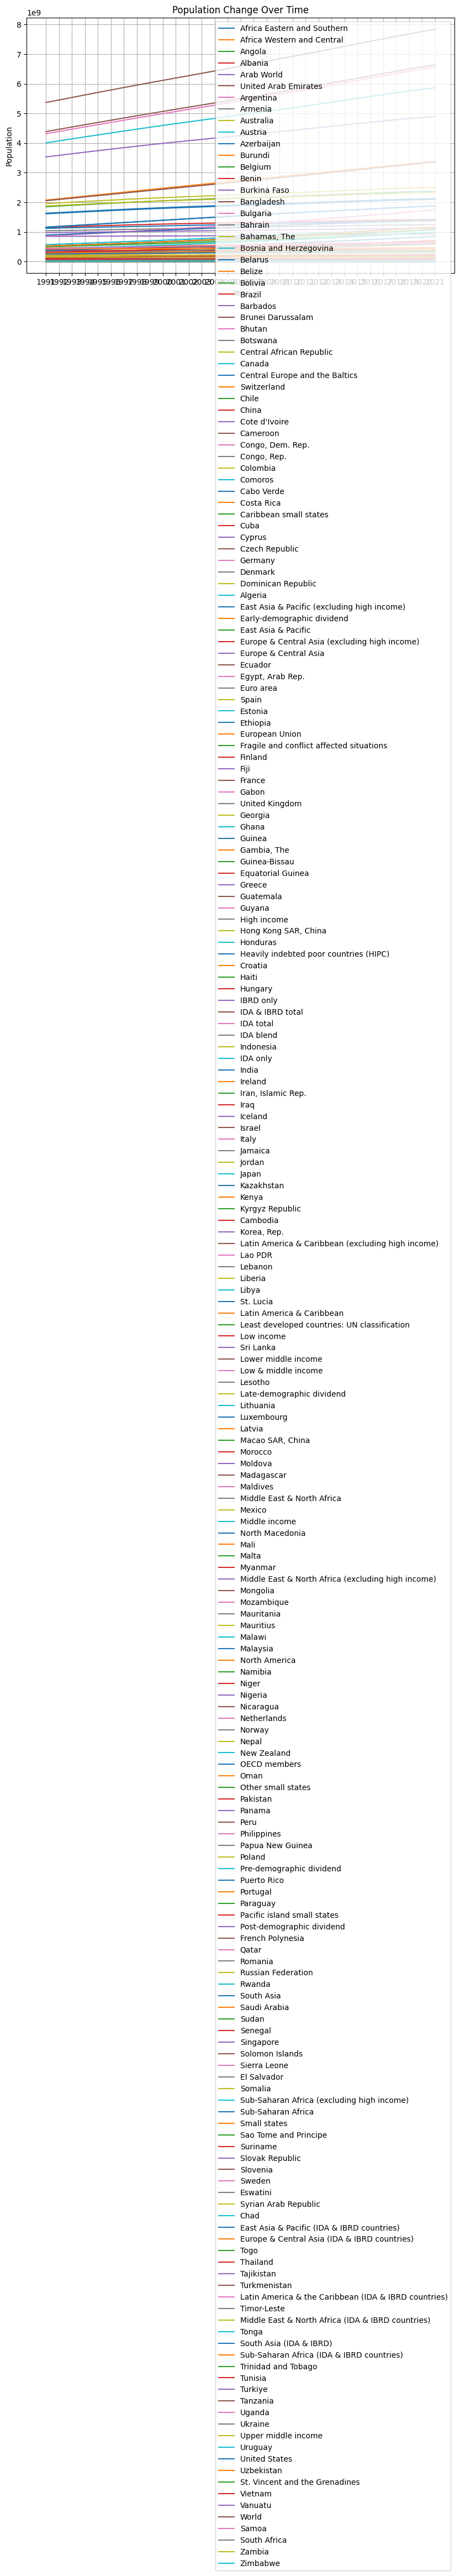

In [202]:
plt.figure(figsize=(10, 6))
for country in merged_df['Country Name'].unique():
    country_data = merged_df[merged_df['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Population'], label=country)

plotting('Year', 'Population', 'Population Change Over Time', True, True)

<p>
    Observations:
    <ol>
        <li>Most of the lines in the plot have an upward slope. This indicates that the population of these regions/countries has generally increased over the period shown. <strong>However</strong>, the rate of increase varies <em>significantly</em>.</li>
        <li>Some lines have a steeper slope, suggesting more rapid population growth. On the other hand, other lines are flatter, which indicates slower population growth or even potential periods of decline.</li>
        <li>The slopes of the lines <strong>vary considerably</strong>, indicating that different regions/countries experience different rates of population growth.</li>
    </ol>
</p>

#### Question 2: Which regions/countries have experienced the most volatile economic growth (GDP per capita) during this period?

<p>
    Answering this question requires taking two main approaches:
    <ol>
        <li><strong>Calculating Standard Deviation</strong>: The standard deviation is a statistical measure of dispersion. A higher standard deviation indicates greater volatility. Therefore, we will calculate the standard deviation of GDP per capita growth for each region/country over the entire period.</li>
        <li><strong>Visualizing GDP Growth Over Time</strong>: We will visualize the GDP per capita growth for each region/country over time, to show a detailed view of the fluctuations over time.</li>
    </ol>
</p>

In [203]:
#Calculating the standard deviation of GDP per capita growth for each country
std_devs = merged_df.groupby('Country Name')['GDP Per Capita Growth'].std()

In [204]:
#Getting the top 10 most volatile regions/countries
top_10_volatile = std_devs.nlargest(10)

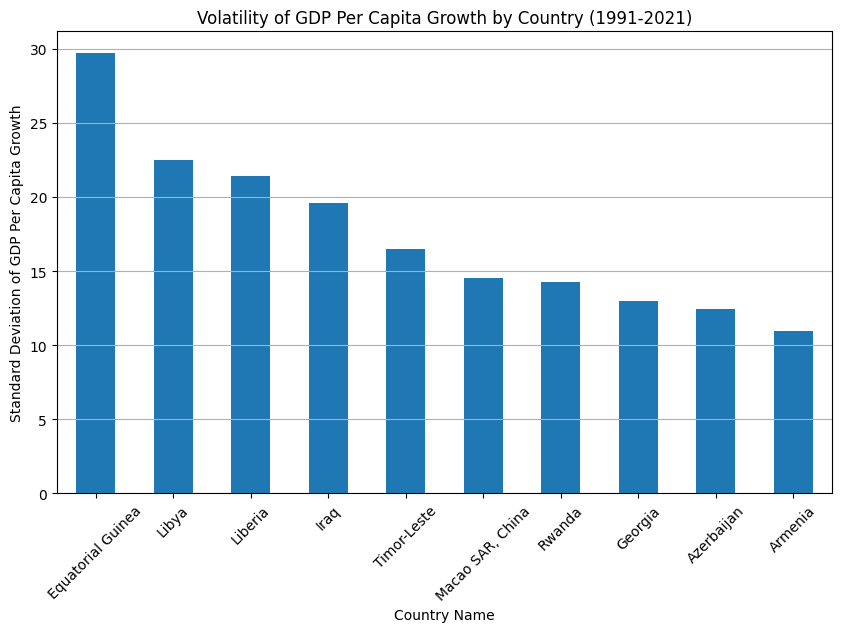

In [205]:
#Plotting the standard deviations
plt.figure(figsize=(10, 6))
top_10_volatile.plot(kind='bar')
plt.ylabel('Standard Deviation of GDP Per Capita Growth')
plt.title('Volatility of GDP Per Capita Growth by Country (1991-2021)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [206]:
top_10_countries = top_10_volatile.index.tolist()

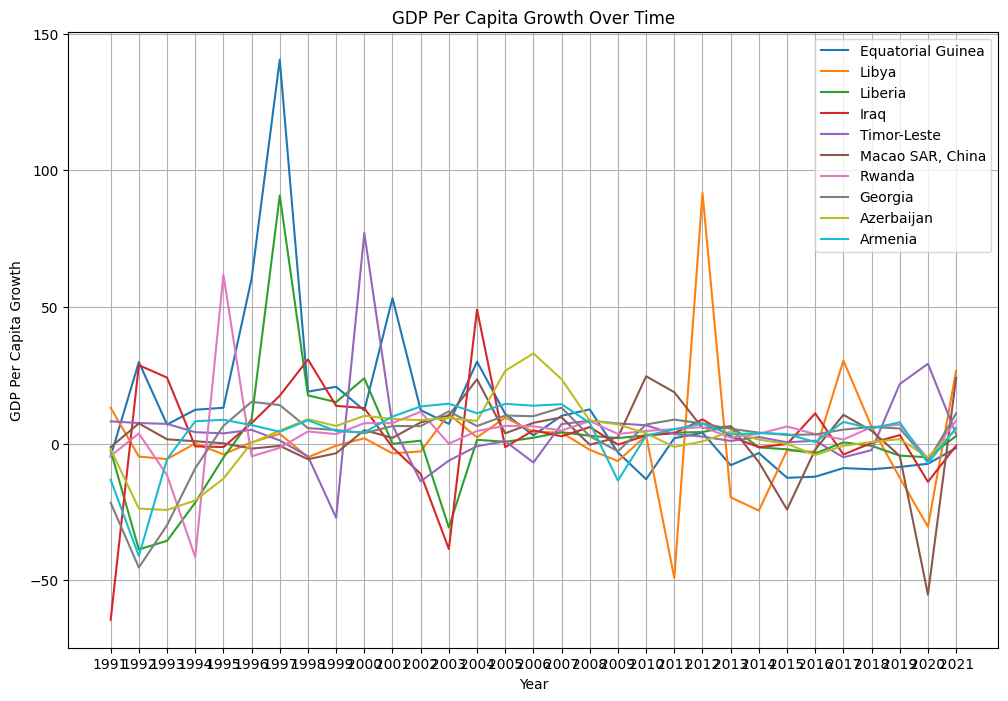

In [207]:
plt.figure(figsize=(12, 8))
for country in top_10_countries:
    country_data = merged_df[merged_df['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['GDP Per Capita Growth'], label=country)

plotting('Year', 'GDP Per Capita Growth', 'GDP Per Capita Growth Over Time', True, True)

The most siginficant observation that we can conclude from those plots is regarding **Equatorial Guinea**. The *bar chart* clearly identifies Equatorial Guinea as having the highest standard deviation in `GDP per capita growth`. The *line chart* confirms this, showing dramatic spikes and dips in its growth rate over time. This indicates that Equatorial Guinea's economy has experienced very large and frequent fluctuations.

#### Question 3: Is there a visible relationship between GDP per capita growth and unemployment rate?

To explore the relationship between `GDP per capita growth` and the `unemployment rate`, we will use scatter plots; as it is ideal for examining the correlation between two continuous variables.

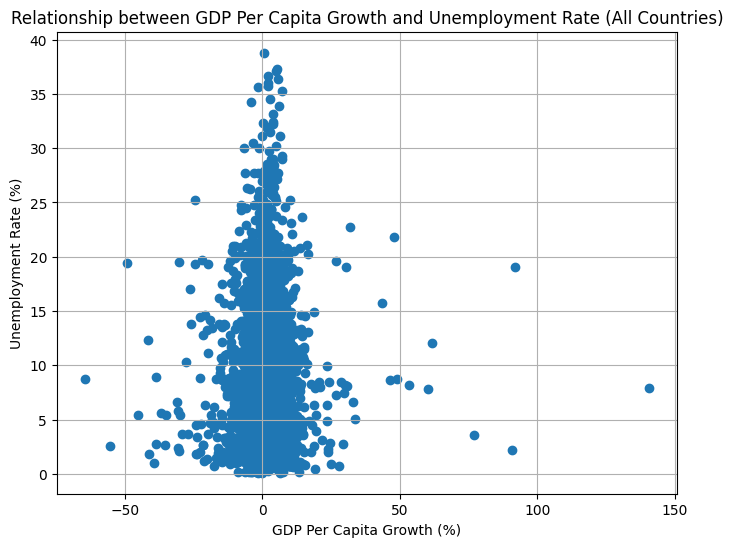

In [208]:
#Plotting a scatter plot for all countries
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['GDP Per Capita Growth'], merged_df['Unemployment Rate'])

plotting('GDP Per Capita Growth (%)', 'Unemployment Rate (%)', 'Relationship between GDP Per Capita Growth and Unemployment Rate (All Countries)', False, True)

Conclusion:

The points on the scatter plot are **not** clustered around a clear line. This suggests that there's **no strong** linear correlation between `GDP per capita growth` and the `unemployment rate` across all countries.

#### Question 4: Are there any noticeable trends in the employment-to-population ratio over time, and do these trends differ across regions/countries?

<p>
    <strong>Note</strong>: Answering this question is straightforward. However, due to the large number of the regions/countries we are investigating, our colnclusion might not be that accurate.
</p>

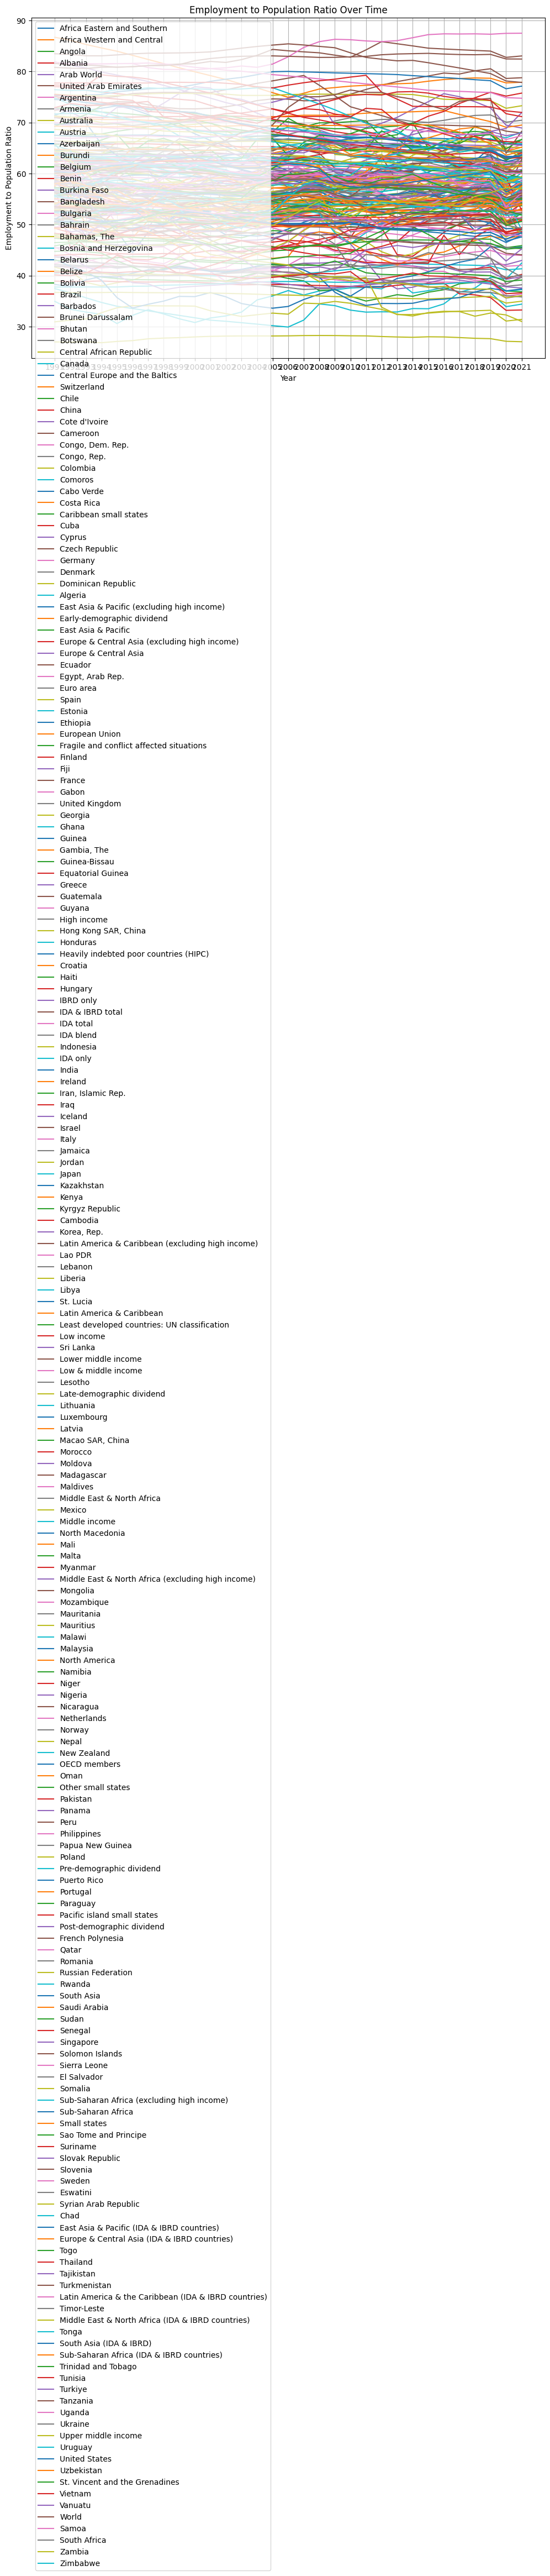

In [209]:
plt.figure(figsize=(12, 8))
for country in merged_df['Country Name'].unique():
    country_data = merged_df[merged_df['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Employment to Population Ratio'], label=country)

plt.xlabel('Year')
plt.ylabel('Employment to Population Ratio')
plt.title('Employment to Population Ratio Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Observations:
1. Although there are some noticeable variations and fluctuations, most lines appear relatively stable within a certain range. This suggests that the `employment-to-population` ratio doesn't *drastically* change year-to-year for most countries.
2. While there are some small upward or downward trends visible for individual countries, there isn't a strong, consistent global trend of increasing or decreasing `employment-to-population` ratios across all countries.

### **5.2:** Reflection

<p>
    Giving more time, I would mostly prioritize enhancing the dataset's quality and scope. This would involve seeking more accurate and complete data sources, potentially filling missing values with robust imputation methods, and expanding the analysis to include additional socioeconomic indicators relevant to population dynamics or spanning a wider time period.
</p>
<p>
    Furthermore, I would conduct a more in-depth investigation of data quality issues, including outlier detection and handling, and explore feature engineering techniques like feature extraction and dimensionality reduction to manage the increased dimensionality resulting from the inclusion of more indicators.
</p>
<p>
    The ultimate aim is for a more comprehensive and nuanced analysis of the interplay between population and socioeconomic development.
</p>